In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import boink
from boink import libboink
from boink.dbg import dBG
from boink.storage import SparseppSetStorage
from boink.hashing import FwdUnikmerShifter, CanUnikmerShifter

from ficus import FigureManager
import numpy as np
from scipy import sparse
import seaborn as sns
import screed

from cppyy.gbl import std

In [3]:
def kmers(sequence, K):
    for i in range(len(sequence) - K + 1):
        yield sequence[i:i+K]

In [38]:
state.first

3

In [36]:
p

'AGTTGGTCG'

In [31]:
graph.insert('GTTGGTCGC')

True

In [5]:
store = SparseppSetStorage.build()
hasher = CanUnikmerShifter.build(31, 7)
graph = dBG[SparseppSetStorage, CanUnikmerShifter].build(store, hasher)

In [6]:
tagger = libboink.cdbg.UTagger[SparseppSetStorage].StreamingTagger.build(graph, ukhs)
processor = libboink.cdbg.UTagger[SparseppSetStorage].Processor.build(tagger)

In [7]:
%%time
for n_reads, state in processor.chunked_process('/store/public/sequencing-runs/MMETSP/data/Skeletonema_marinoi/SRR1300462/SRR1300462_1.fastq'):
    print(n_reads)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [11]:
tagger.tag_map.size()

3784044

In [65]:
processor.n_too_short()

0

In [62]:
for i, record in enumerate(screed.open('/store/public/sequencing-runs/MMETSP/data/Skeletonema_marinoi/SRR1300462/SRR1300462_1.fastq')):
    print(len(record.sequence), len(tagger.query_neighborhood_tags(record.sequence)))
    print(record.sequence, 'N' in record.sequence)
    if i > 10:
        break

50 0
NGCCCATTGATTCAGGAGGCTCTTACAAACCACACCACGCTAGTAGACCT True
50 2
GGACGATTTGCAGGCGTTCTATCTTATGGGTGGATGTGTCTTGGCATCAG False
50 0
CGCCGATTGTGCCTCCCACTTGACACTGAGTGGTCGATACGGGAATGCCA False
50 1
CTCCAACTCTCATGGATTTAACTTCATCTTCTACGTTCGTGCTGTCGGTA False
50 3
AAGACAACTACGTATCACAGCTTCGTGCTGCTGACTCATCGTTGGATAAC False
50 2
TTTATTTCTTATTTCGCCGTTTGATTTTTTTTTTCGTGTTAGACTATTTG False
50 1
CTGGACTTTCCAGAGGAGGACCAACTGTCACTTCCCCAGCTTCCACTTCC False
50 2
GTGTGATTCGCTAGGTCTCCTCAATGGTAGGGGAACTATCAGCAATGGTA False
50 1
CAAACATGCTGTTGCTGGAGATATTGTCGCCCTTGTTGGCCTTAAAGATA False
50 2
GATTAGGTGGAGCCAGCTCTCCAAGATAAATTGGCACCAGCACCGTCGAT False
50 0
ATACATTCTCACCTACGGGCAGGTTTAGTTTCTATGGCCAACCTACCGAT False
50 0
CGGAAATCTTGGAAACCTTGGTATTCTTTCTCCTATTTACTCACAACAAC False


In [29]:
unikmer_mat = np.zeros((ukhs.n_hashes(), ukhs.n_hashes()), dtype=np.uint32)

In [38]:
it = tagger.tag_map.begin()
while it != tagger.tag_map.end():
    unikmer_mat[it.second.left_partition, it.second.right_partition] += 1
    it.__preinc__()

In [39]:
(unikmer_mat > 0).sum() 

1007536

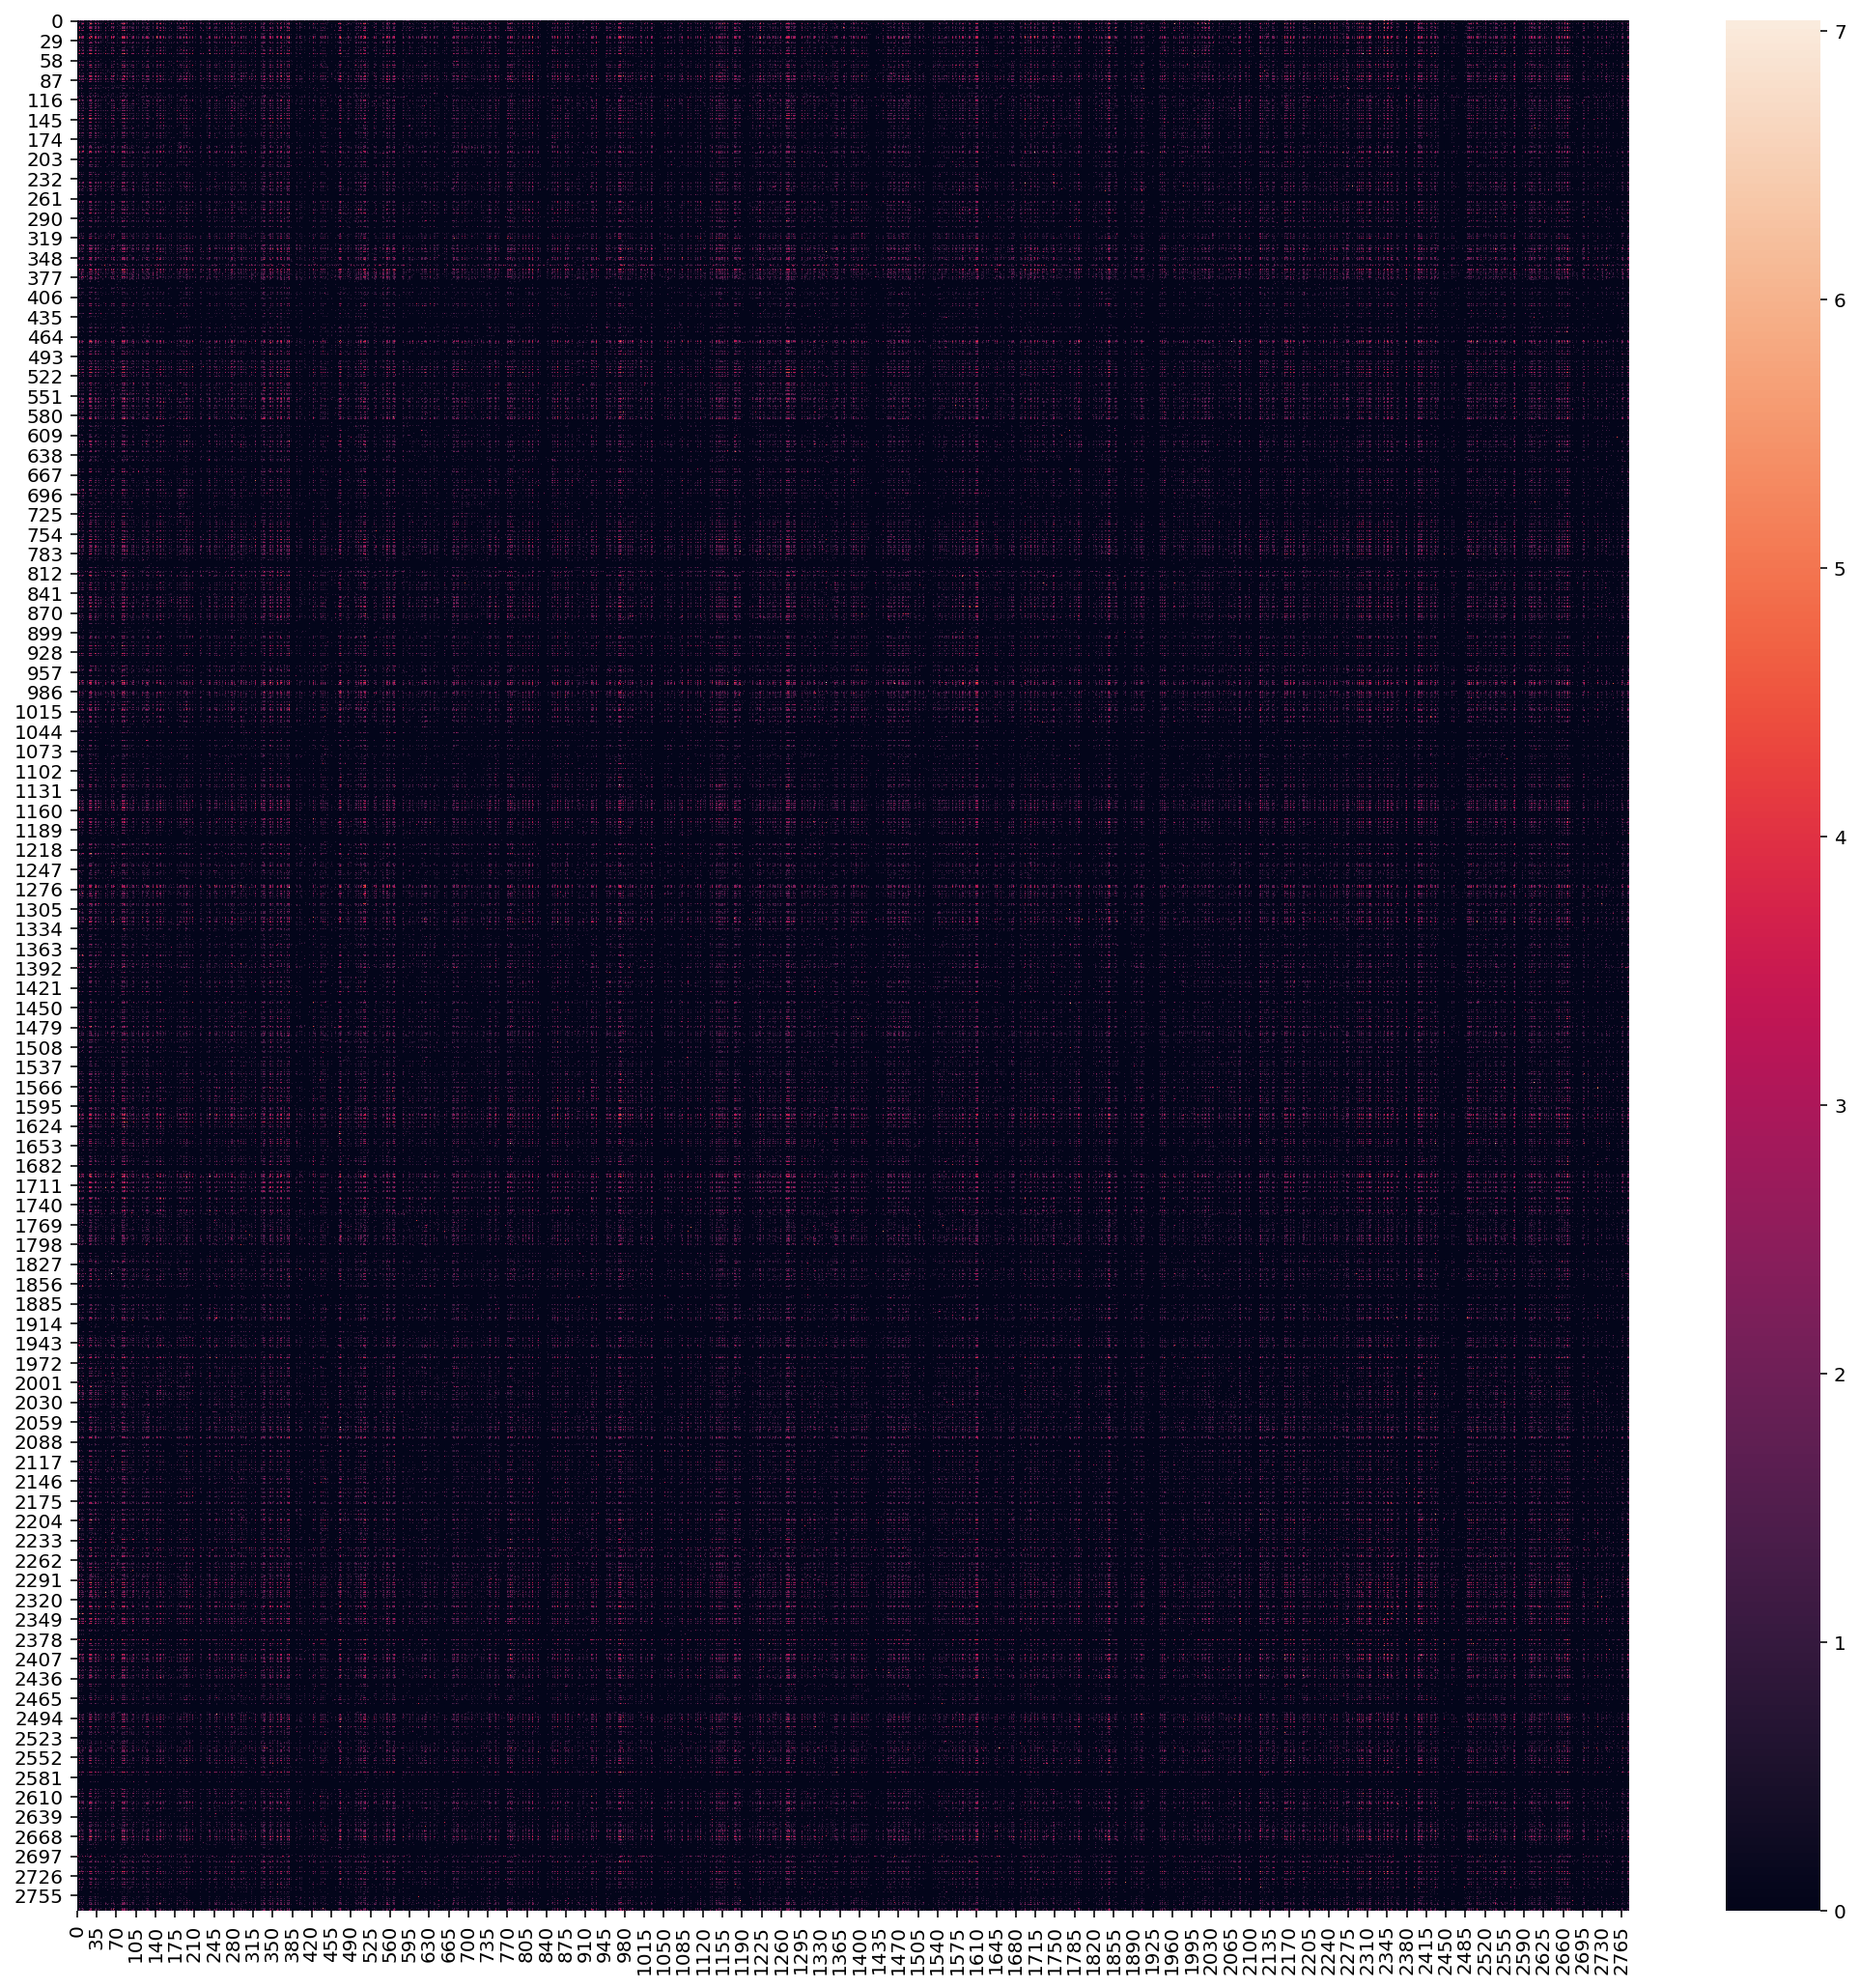

In [17]:
with sns.cubehelix_palette(8, reverse=True):
    with FigureManager(show=True, figsize=(18,18)) as (fig, ax):
        sns.heatmap(np.log1p(unikmer_mat), ax=ax)

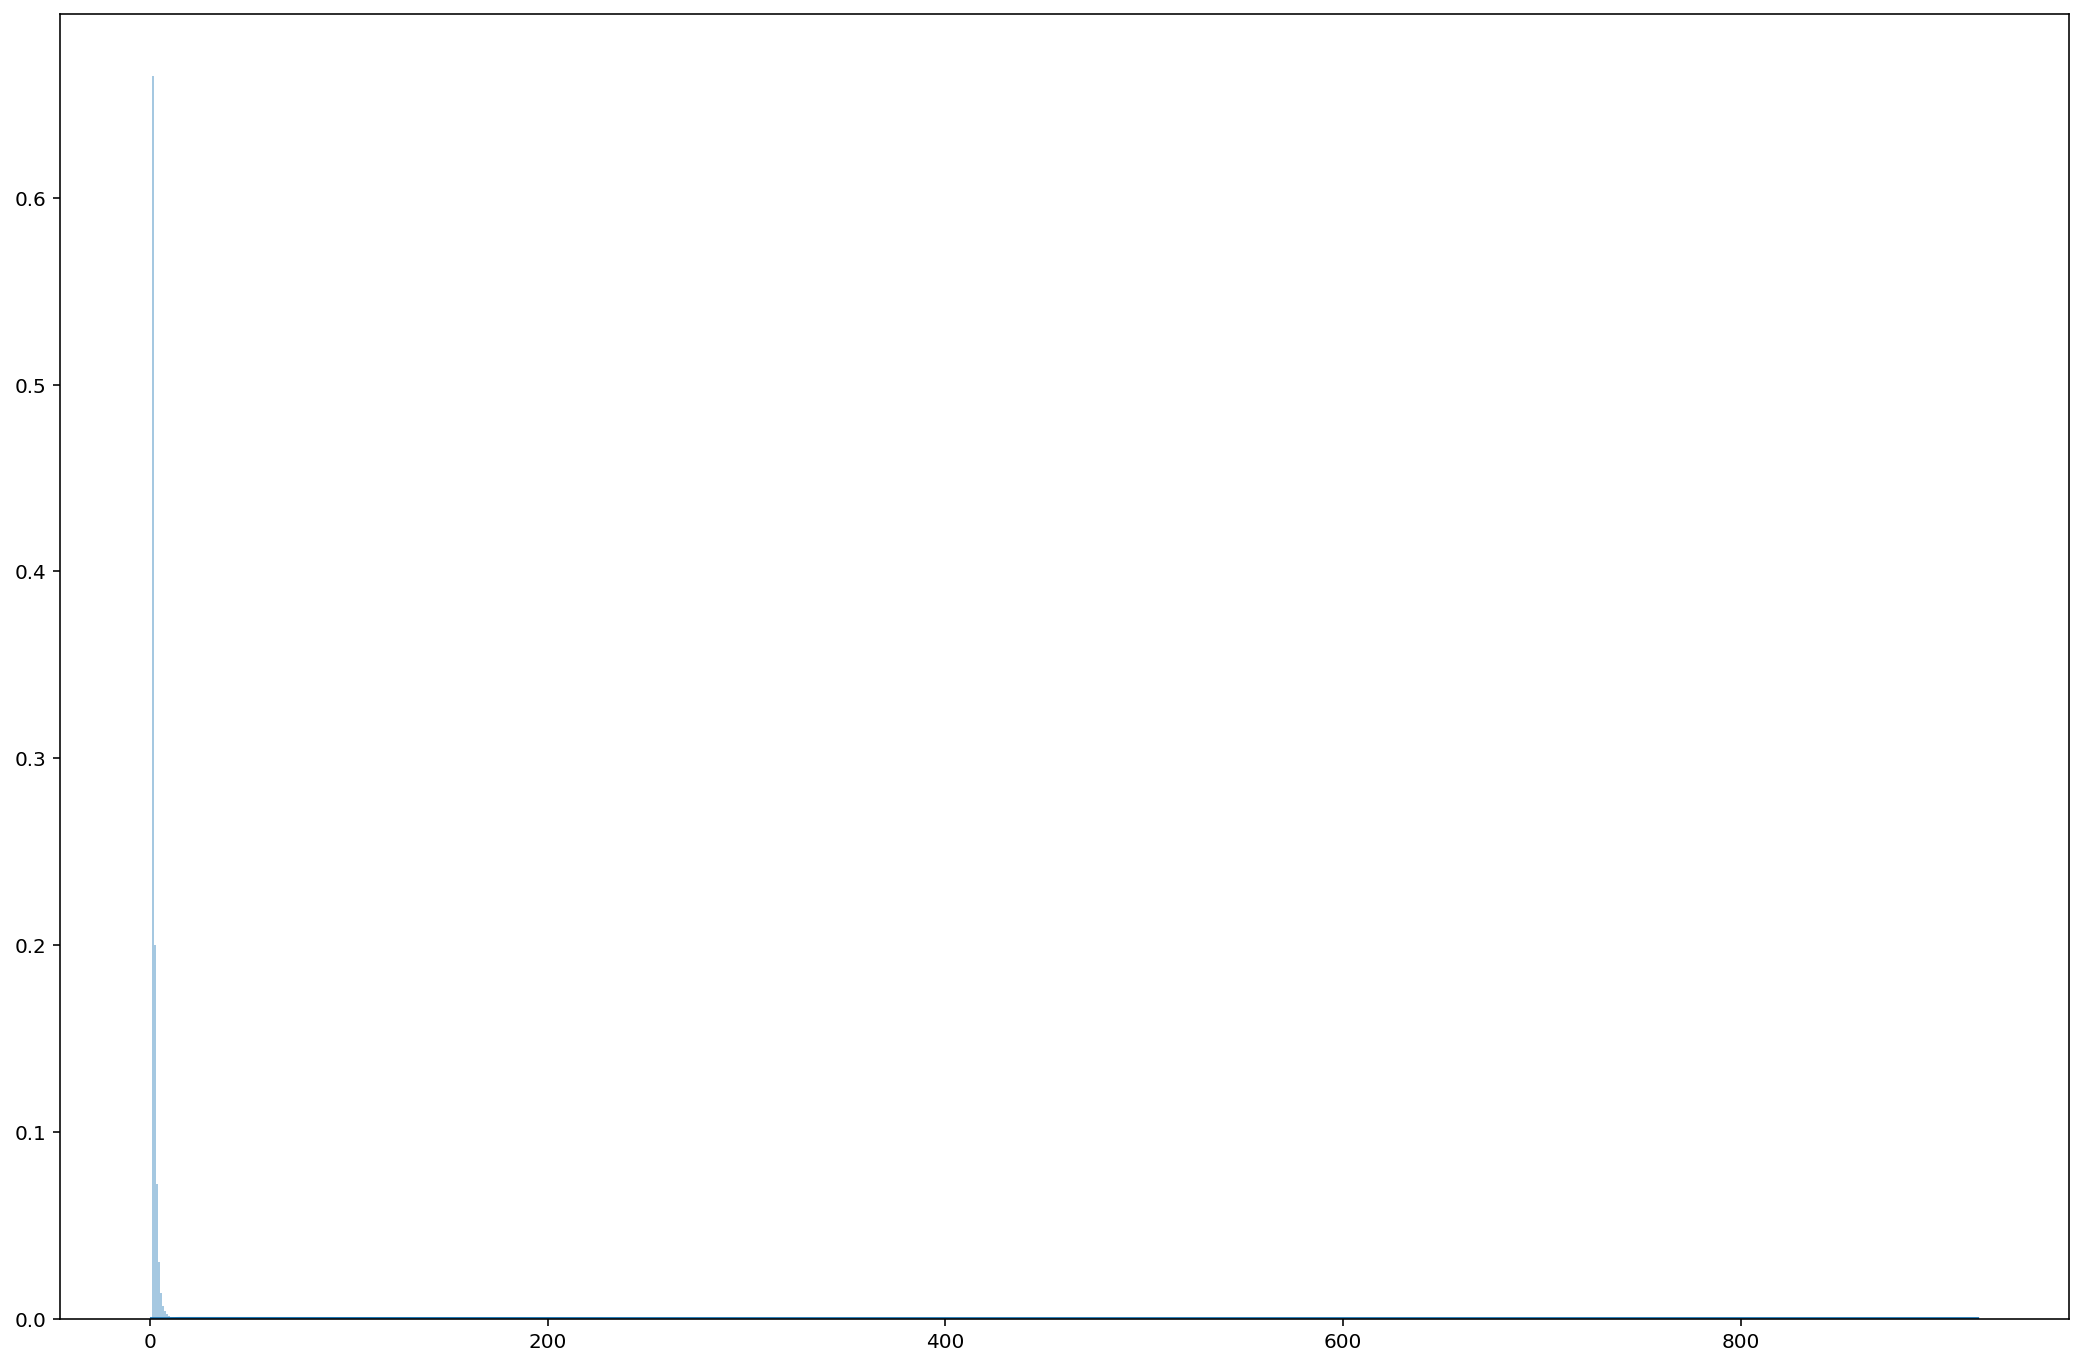

In [49]:
with FigureManager(show=True) as (fig, ax):
    sns.distplot(unikmer_mat[unikmer_mat > 0], bins=int(unikmer_mat.max()) - 1)

In [40]:
print(list(unikmer_mat[0,:]))

[0, 20, 0, 10, 0, 6, 1, 0, 0, 3, 2, 0, 8, 0, 0, 3, 0, 0, 4, 1, 0, 0, 0, 0, 3, 1, 8, 0, 0, 1, 1, 0, 12, 2, 0, 4, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 3, 1, 5, 0, 0, 1, 0, 0, 5, 0, 1, 1, 0, 3, 0, 1, 2, 3, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 1, 0, 1, 7, 3, 0, 0, 0, 0, 6, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 3, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 4, 1, 3, 0, 0, 0, 0, 2, 0, 3, 2, 1, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 

In [55]:
with open('uk.mat.csv', 'w') as fp:
    print(',' + ','.join([f'V{i}' for i in range(len(unikmer_mat))]), file=fp)
    for i in range(len(unikmer_mat)):
        print(f'V{i},' + ','.join((str(n) for n in unikmer_mat[i,:])), file=fp)

In [56]:
!head uk.mat.csv


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221

In [30]:
np.savetxt('unikmergraph.mat.csv', unikmer_mat, delimiter=',')

In [18]:
unikmer_graph = sparse.csgraph.csgraph_from_dense(unikmer_mat)

In [19]:
unikmer_graph

<2778x2778 sparse matrix of type '<class 'numpy.float64'>'
	with 1007536 stored elements in Compressed Sparse Row format>

In [20]:
n_components, labels = sparse.csgraph.connected_components(csgraph=unikmer_graph, directed=True, return_labels=True)

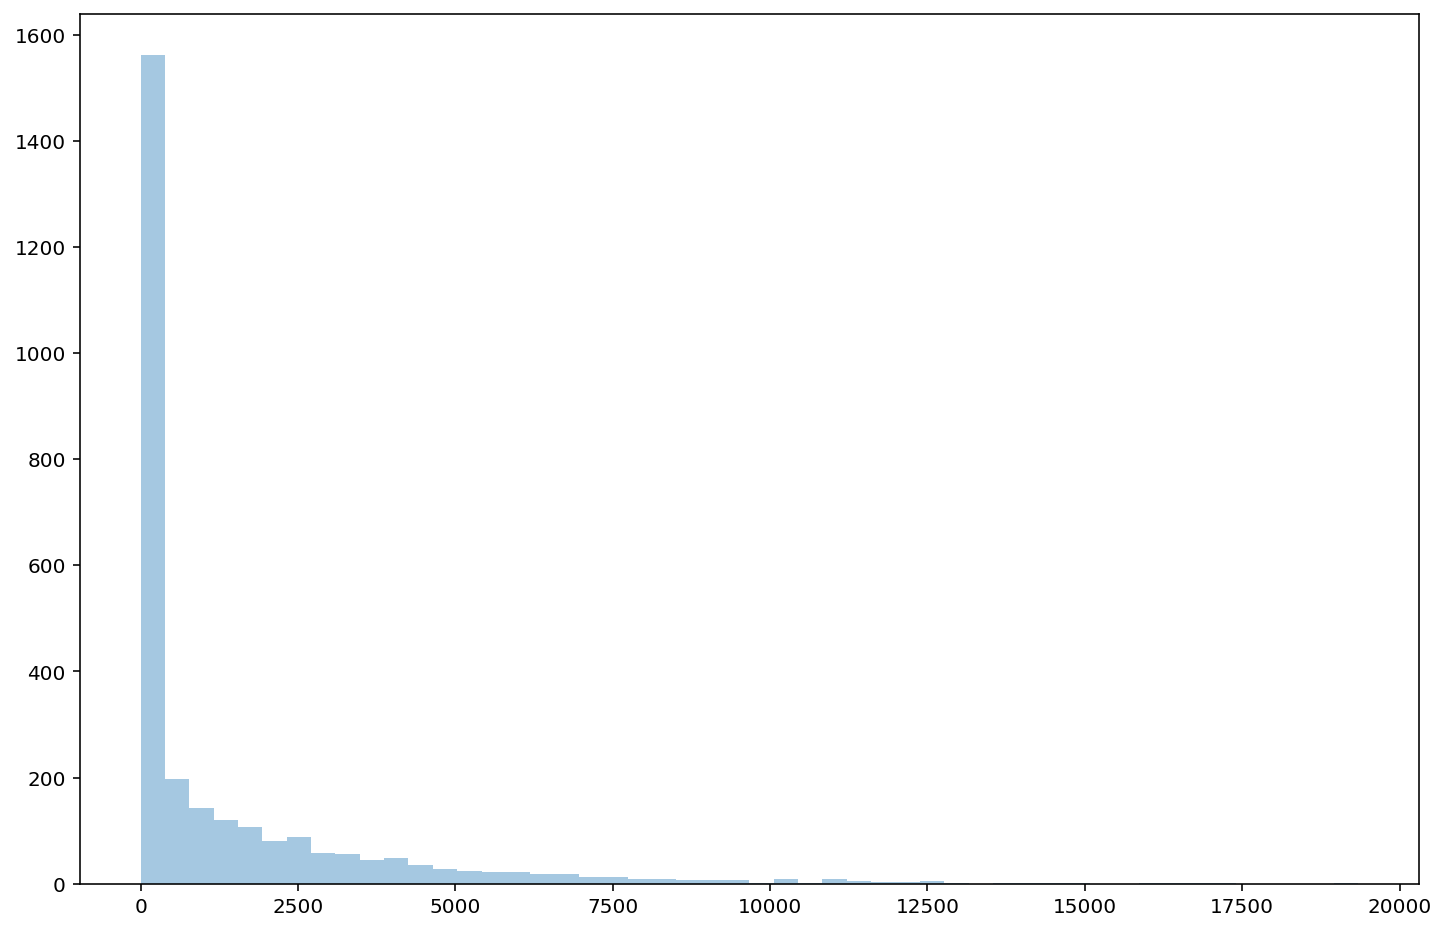

In [59]:
with FigureManager(show=True, figsize=(12,8)) as (fig, ax):
    sns.distplot(unikmer_mat.sum(axis=1), kde=False, ax=ax)